## Trabalho Prático 2 - Machine Learning

### Objetivo

O objetivo deste trabalho é implementar e avaliar o algoritmo Naive Bayes aplicado a diferentes
problemas de classificação. Adicionalmente o algoritmo K-Médias deve ser utilizado para clustering.









In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import combinations

sns.set_theme()


### 1. Classificação - Base de Dados Iris

1.1. Conforme visto nas primeiras aulas, busque e carregue o Iris Dataset:
  - 4 Features: Sepal Length, Sepal Width, Petal Length, Petal Width
  - 3 Classes: Versicolor, Setosa e Virginica



In [3]:
# Obter dataset Íris utilizando o pacto SciKit Learn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = pd.Series(iris.target_names[iris.target])
X = iris.data
y = iris.target
caracteristicas = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1.2. Com objetivo de visualizar os dados, plote os gráficos a seguir:
  - As 6 combinações em 2D de dois dos quatro atributos do Iris dataset.
  - As 4 combinações em 3D de três dos quatro atributos do Iris dataset.



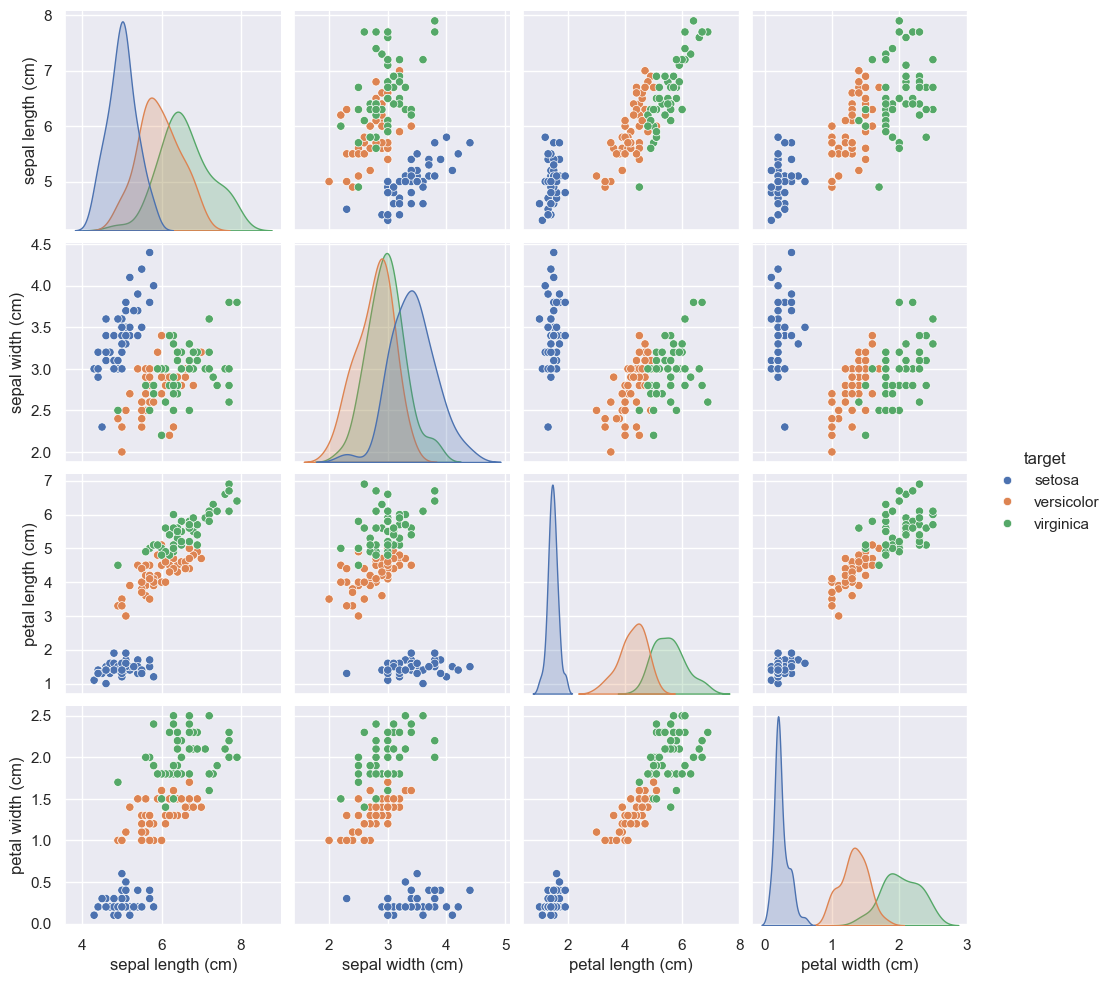

In [4]:
sns.pairplot(df, hue="target")

1.3. Implemente o algoritmo Gaussian Naive Bayes e aplique à base de dados.
  - Plote a superfície de decisão obtida pelo algoritmo.


In [5]:
# Implementação do Naive Bayes utilizando classe
class ClassificadorNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.media = {}
        self.variancia = {}
        self.anteriores = {}

        for classe in self.classes:
            X_classe = X[y == classe]
            self.media[classe] = np.mean(X_classe, axis=0)
            self.variancia[classe] = np.var(X_classe, axis=0)
            self.anteriores[classe] = X_classe.shape[0] / X.shape[0]

    def calcular_probabilidades(self, media, variancia, x):
        eps = 1e-6  # para evitar divisão por zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * variancia + eps)
        exponent = np.exp(-((x - media) ** 2) / (2 * variancia + eps))
        return coeff * exponent

    def calcular_posteriores(self, x):
        posteriors = []

        for classe in self.classes:
            prior = np.log(self.anteriores[classe])
            likelihoods = np.sum(np.log(self.calcular_probabilidades(self.media[classe], self.variancia[classe], x)))
            posterior = prior + likelihoods
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self.calcular_posteriores(x) for x in X])

    def plotar_fronteira_decisao():
        pass


In [6]:

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o classificador
nb = ClassificadorNaiveBayes()

# Treinar o modelo
nb.fit(X_train, y_train)

# Fazer previsões
y_pred = nb.predict(X_test)

# Avaliar a acurácia do modelo
acuracia = np.mean(y_pred == y_test)
print(f"Acurácia: {acuracia:.2f}")

Acurácia: 0.98


Acurácia[sepal length (cm) x sepal width (cm)]: 0.82
0 0
Acurácia[sepal length (cm) x petal length (cm)]: 0.93
0 1
Acurácia[sepal length (cm) x petal width (cm)]: 1.00
0 2
Acurácia[sepal width (cm) x petal length (cm)]: 0.96
1 0
Acurácia[sepal width (cm) x petal width (cm)]: 0.96
1 1
Acurácia[petal length (cm) x petal width (cm)]: 1.00
1 2


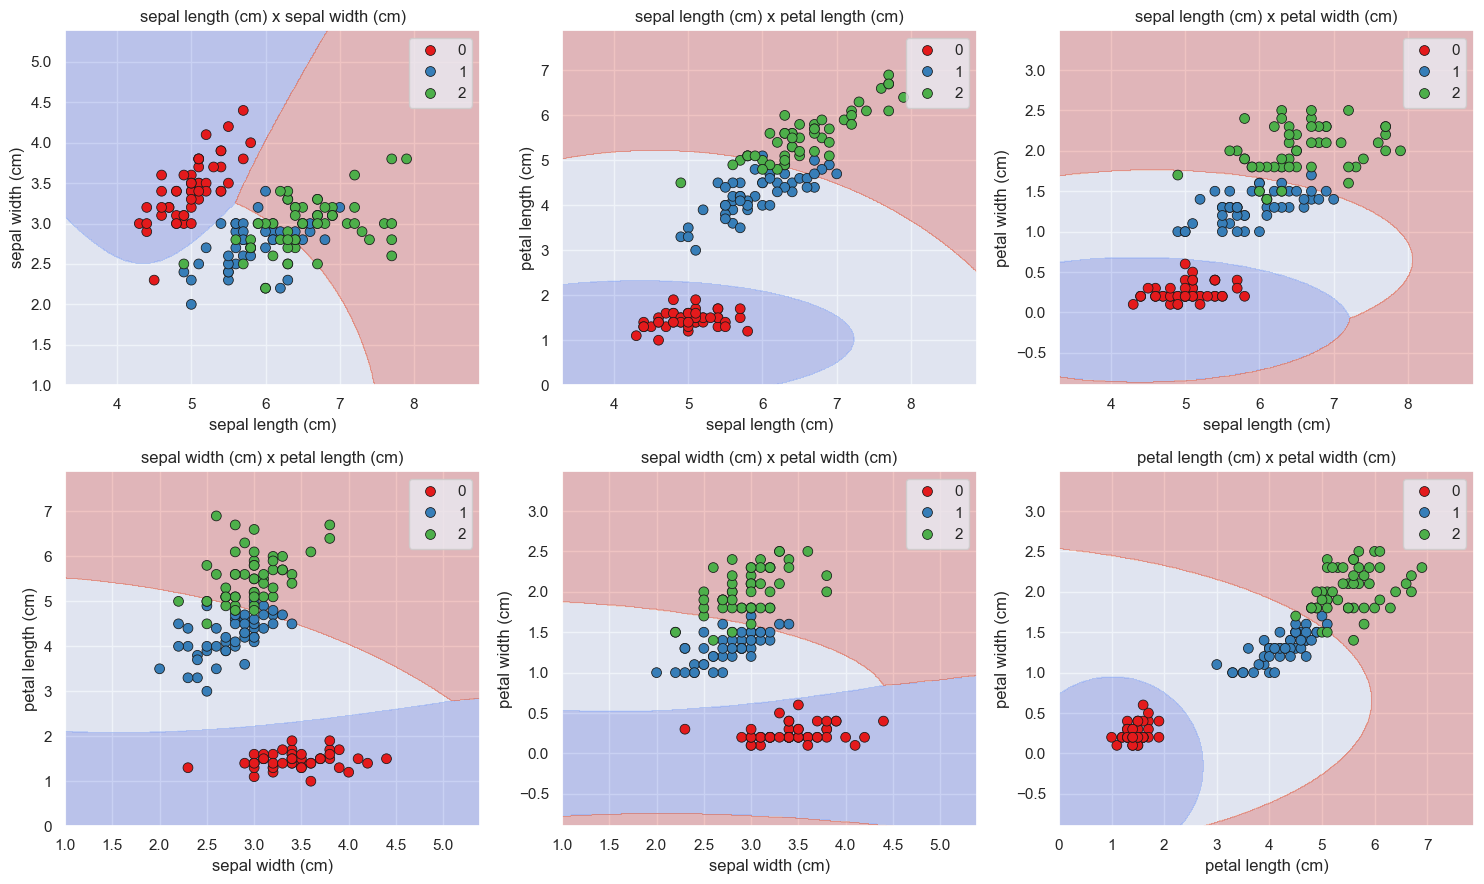

In [7]:
# Plotar a fronteira de decisão
fig,axes = plt.subplots(2,3,figsize=(15, 9))

pares_caracteristicas = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i,par in enumerate(pares_caracteristicas):
  X = iris.data[:, par]
  y = iris.target
  
  # Dividir o conjunto de dados em conjunto de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Inicializar o classificador
  nb = ClassificadorNaiveBayes()

  # Treinar o modelo
  nb.fit(X_train, y_train)

  # Fazer previsões
  y_pred = nb.predict(X_test)

  # Avaliar a acurácia do modelo
  acuracia = accuracy_score(y_test,y_pred)
  print(f"Acurácia[{caracteristicas[par[0]]} x {caracteristicas[par[1]]}]: {acuracia:.2f}")
  
  # Plotar a fronteira de decisão
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))

  # Prever para cada ponto na grade
  grid_points = np.c_[xx.ravel(), yy.ravel()]
  Z = nb.predict(grid_points)
  Z = Z.reshape(xx.shape)
  
  i_ax = i // 3
  j_ax = i % 3

  ax = axes[i_ax,j_ax]
  print(i // 3, i % 3)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap=sns.color_palette("coolwarm", as_cmap=True))
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k', s=50, ax=ax)
  ax.set_xlabel(caracteristicas[par[0]])
  ax.set_ylabel(caracteristicas[par[1]])
  ax.set_title(f"{caracteristicas[par[0]]} x {caracteristicas[par[1]]}")


plt.tight_layout()
plt.show()
  
  


1.4. Implemente o algoritmo Regressão Logística (2 versões, com e sem feature engineering) e aplique à base de dados.


In [8]:
# Implementação do classificador com regressão logística e feature engineering.
# Para utilização com mapeamento de feature, basta passar o grau do polinômio
# Importante considerar que se trata de um classificador multiclase
class RegressaoLogistica:
    def __init__(self, taxa_aprendizado=0.01, num_interacoes=1000, grau=0):
        self.taxa_aprendizado = taxa_aprendizado
        self.num_interacoes = num_interacoes
        self.pesos = []
        self.bias = []
        self.grau = grau
        self.num_caracteristicas = None
        self.classes = np.unique(y)
        self.models=[]

    def sigmoide(self, z):
        return 1 / (1 + np.exp(-z))

    def mapear_atributos(self, X):
        num_amostras, num_caracteristicas = X.shape
        self.num_caracteristicas = num_caracteristicas
        X_novo = np.ones((num_amostras, 1))  # Incluir termo de polaridade zero
        for i in range(1, self.grau + 1):
            for j in range(i + 1):
                novo_termo = (X[:, 0] ** (i - j)) * (X[:, 1] ** j)
                X_novo = np.column_stack((X_novo, novo_termo))
        
        return X_novo

    def fit(self,X,y):
        for k in self.classes:
            y_novo = (y==k).astype(int)
            pesos, bias = self._fit_classe(X, y_novo)
            self.pesos.append(pesos)
            self.bias.append(bias)
            
    def _fit_classe(self, X, y):
        if self.grau > 0:
            X_novo = self.mapear_atributos(X)
            X = X_novo.copy()
            
        num_amostras, num_caracteristicas = X.shape
        pesos = np.zeros(num_caracteristicas)
        bias = 0

        # Gradiente descendente
        for _ in range(self.num_interacoes):
            linear_model = np.dot(X, pesos) + bias
            y_pred = self.sigmoide(linear_model)

            # Atualizar parâmetros usando gradiente descendente
            dw = (1 / num_amostras) * np.dot(X.T, (y_pred - y))
            db = (1 / num_amostras) * np.sum(y_pred - y)

            pesos -= self.taxa_aprendizado * dw
            bias -= self.taxa_aprendizado * db
        return pesos,bias
    
    def predict(self,X):
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]
    
    def predict_proba(self, X):
        if self.grau > 0:
            X_novo= self.mapear_atributos(X)
            X = X_novo.copy()
        
        probs = []    
        for pesos,bias in zip(self.pesos,self.bias):
            linear_model = np.dot(X, pesos) + bias
            probs.append(self.sigmoide(linear_model))
           
            
        return np.array(probs).T
    
    

In [9]:
# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados (importante para a regressão logística)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Criar e treinar o classificador de regressão logística sem feature engineering
classificador = RegressaoLogistica()
classificador.fit(X_train_scaled, y_train)
y_pred = classificador.predict(X_test_scaled)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia da regressão logística sem feature engineering = {acuracia:.4f}")

Acurácia da regressão logística sem feature engineering = 0.8000


In [11]:
# Criar e treinar o modelo de regressão logística com feature engineering (polinômios)
classificadorMap = RegressaoLogistica(grau=2)
classificadorMap.fit(X_train_scaled, y_train)
y_pred = classificadorMap.predict(X_test_scaled)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia da regressão logística com mapeamento de feature = {acuracia:.4f}")

Acurácia da regressão logística com mapeamento de feature = 1.0000


- Encontre o melhor valor para o parâmetro α e para o grau do polinômio na versão
com feature engineering.

,descricao,taxa_aprendizado,grau,acuracia
0,T_0.01_G_5,0.01,5,1.0
1,T_0.05_G_5,0.05,5,1.0
2,T_0.1_G_5,0.10,5,1.0
3,T_0.15_G_5,0.15,5,1.0
4,T_0.2_G_5,0.20,5,1.0
5,T_0.25_G_5,0.25,5,1.0
6,T_0.01_G_4,0.01,4,1.0
7,T_0.05_G_4,0.05,4,1.0
8,T_0.1_G_4,0.10,4,1.0
9,T_0.15_G_4,0.15,4,1.0


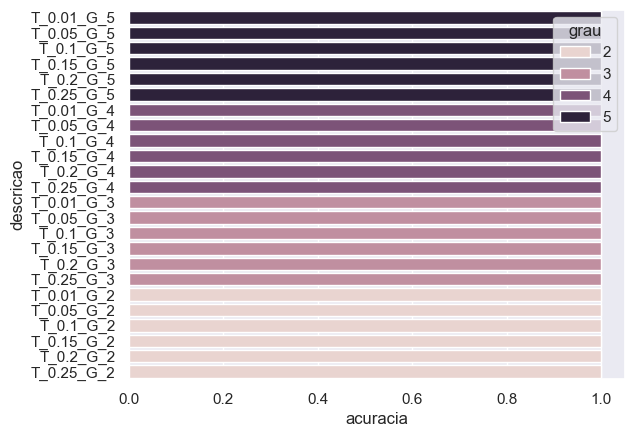

In [12]:
taxas_aprendizado = [0.01, 0.05,0.1, 0.15,0.2,0.25]
graus = [5,4,3,2]

resultados = []

for gr in graus:
  for ta in taxas_aprendizado:
    classificadorMap = RegressaoLogistica(taxa_aprendizado=ta,grau=gr)
    classificadorMap.fit(X_train_scaled, y_train)
    y_pred = classificadorMap.predict(X_test_scaled)
    acuracia = accuracy_score(y_test, y_pred)
    
    resultados.append({
                         "descricao":f"T_{ta}_G_{gr}",
                         "taxa_aprendizado":ta,
                         "grau":gr,
                         "acuracia":round(acuracia,5)}
    )
    
dfResutlado = pd.DataFrame(resultados)

sns.barplot(dfResutlado,x="acuracia",y="descricao",hue="grau")
dfResutlado
  

In [13]:
melhor_resultado = dfResutlado.iloc[dfResutlado["acuracia"].idxmax()]
print(f"A melhor valor para o parâmetro alfa é {melhor_resultado.taxa_aprendizado}, com grau {melhor_resultado.grau}")

A melhor valor para o parâmetro alfa é 0.01, com grau 5


- Plote a superfície de decisão obtida pelo algoritmo.

0 0
0 1
0 2
1 0
1 1
1 2


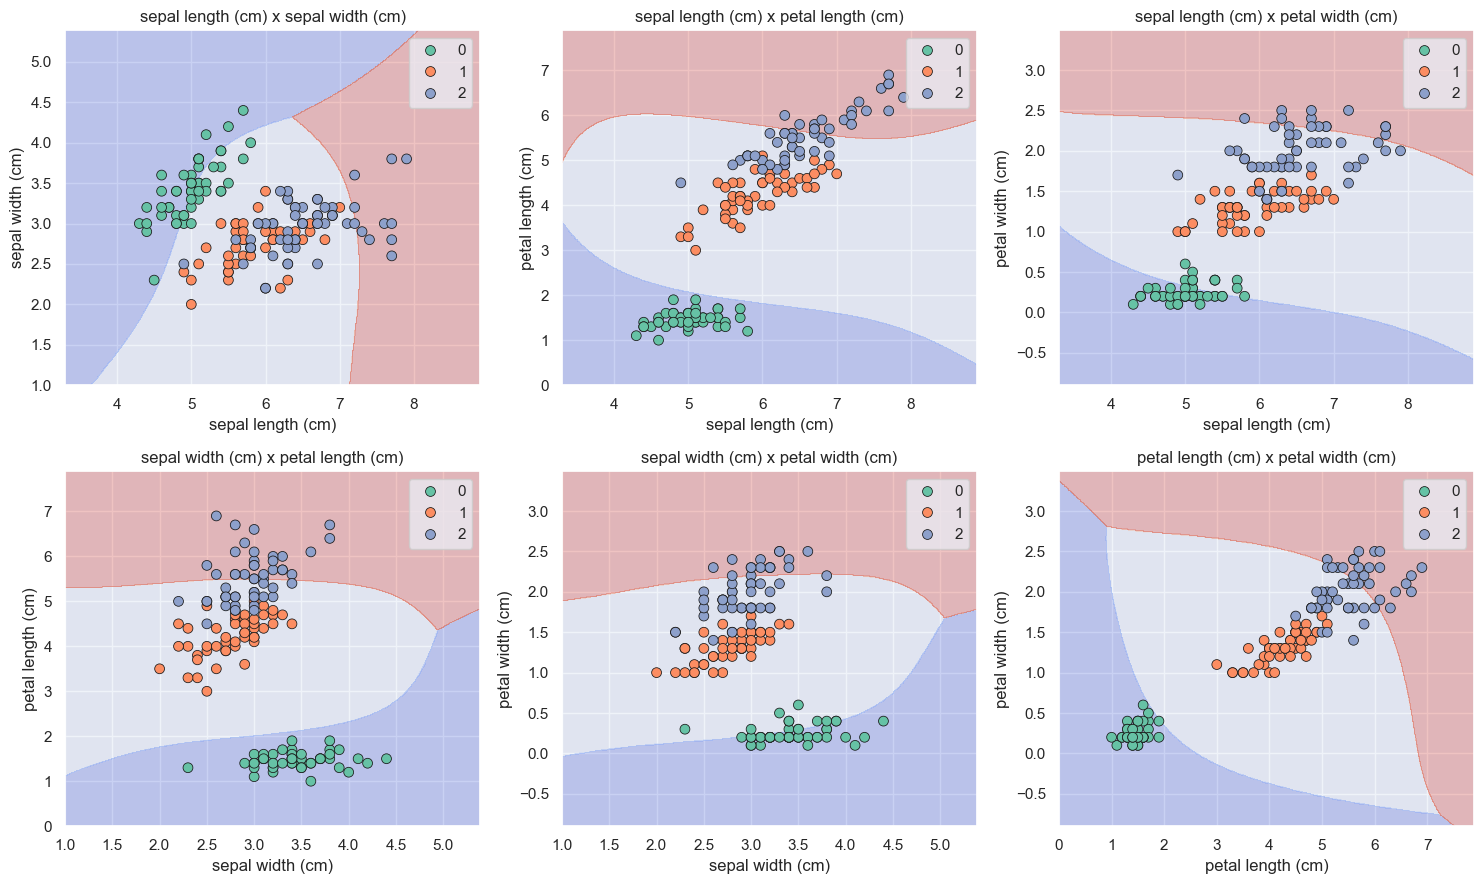

In [14]:
# Plotar a fronteira de decisão
scaler = StandardScaler()

  
fig,axes = plt.subplots(2,3,figsize=(15, 9))

pares_caracteristicas = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


for i,par in enumerate(pares_caracteristicas):
  X = iris.data[:, par]
  X_scaled = scaler.fit_transform(X)
  y = iris.target

  # Inicializar o classificador
  model = RegressaoLogistica(taxa_aprendizado=melhor_resultado.taxa_aprendizado,grau=melhor_resultado.grau)

  # Treinar o modelo
  model.fit(X_scaled, y)
  
  # Plotar a fronteira de decisão
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))

  # Prever para cada ponto na grade
  X_grid = np.c_[xx.ravel(), yy.ravel()]
  X_grid_scaled = scaler.fit_transform(X_grid)

  Z = model.predict(X_grid_scaled)
  Z = Z.reshape(xx.shape)
  
  i_ax = i // 3
  j_ax = i % 3

  ax = axes[i_ax,j_ax]
  print(i // 3, i % 3)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap=sns.color_palette("coolwarm", as_cmap=True))
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set2', edgecolor='k', s=50, ax=ax)
  ax.set_xlabel(caracteristicas[par[0]])
  ax.set_ylabel(caracteristicas[par[1]])
  ax.set_title(f"{caracteristicas[par[0]]} x {caracteristicas[par[1]]}")


plt.tight_layout()
plt.show()




1.5. Compare a eficácia dos classificadores com relação à acurácia, utilizando a divisão dos dados (Treinamento, Validação e Teste). 




- Execute cada experimento 10 vezes e compare as médias dos resultados.

In [15]:
X = scaler.fit_transform( iris.data)
y = iris.target

benchmark=[]
for teste in range(10):
  
  # Dividir o conjunto de dados em treinamento e teste (80% treinamento, 20% teste)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Dividir o conjunto de treinamento em treinamento e validação (75% treinamento, 25% validação)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
  
  rl = RegressaoLogistica()
  rl.fit(X_train,y_train)
  y_rl_pred = rl.predict(X_test)
  acuracia_rl = accuracy_score(y_test,y_rl_pred)
  
  rl5 = RegressaoLogistica(grau=5)
  rl5.fit(X_train,y_train)
  y_pred_rl5 = rl5.predict(X_test)
  acuracia_rl5 = accuracy_score(y_test,y_pred_rl5)
  
  print("="*36)
  print(
  f"""
  Teste no. {teste+1}
  Regressão Logística = {acuracia_rl:.3f}
  Regressão Logística (FE) = {acuracia_rl5:.3f}""")
  print("-"*36)


  Teste no. 1
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 2
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 3
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 4
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 5
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 6
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 7
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 8
  Regressão Logística = 0.900
  Regressão Logística (FE) = 0.767
------------------------------------

  Teste no. 9
  Regressão Logística = 0.900
  Regressão Logísti

1.6. Retire os rótulos da base de dados e Implemente o algoritmo K-Médias para encontrar agrupamentos nos dados. 
Utilizando diferentes valores de K, teste diferentes métricas de distância (pelo menos 3) e avalie os clusters obtidos.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.patches import Ellipse

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar apenas as duas primeiras características

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape

        # Inicializar os centróides escolhendo aleatoriamente K pontos
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            # Atribuir cada ponto ao centróide mais próximo
            self.labels = self._assign_clusters(X)
            
            # Calcular os novos centróides
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Verificar a convergência
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - self.centroids[k], axis=1)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)


- Plote os clusters e também os centróides finais obtidos.

In [22]:
# Treinar o modelo K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# Plotar os resultados
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Classes K-Means')


# Função para plotar as classes reais
def plot_true_labels(X, y_true):
    plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', marker='o', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Classes Reais')



- Plote os clusters e também os centróides finais obtidos.
- Compare visualmente os clusters com as classes reais do problema.

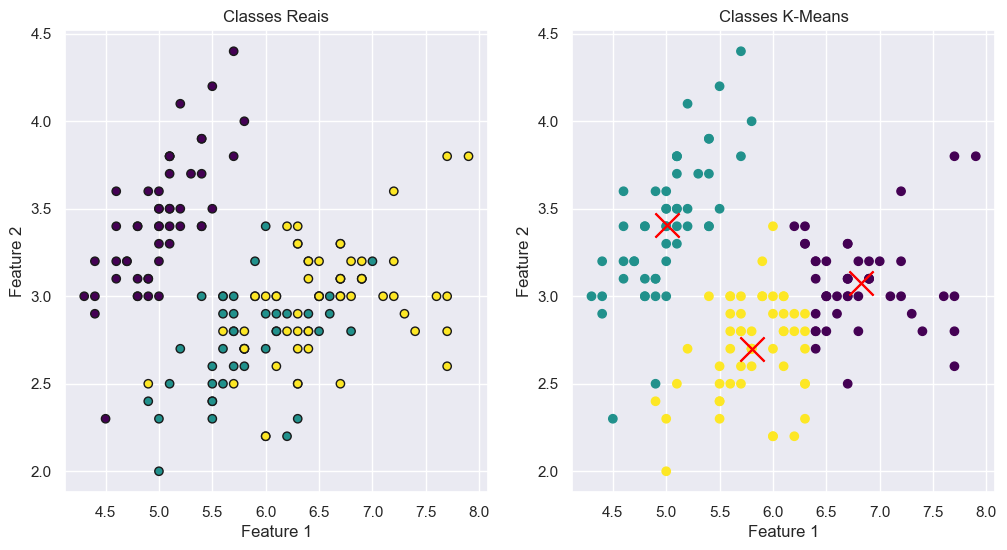

In [23]:
# Plotar os gráficos lado a lado para comparação

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_true_labels(X, y)

plt.subplot(1, 2, 2)
plot_clusters(X, labels, kmeans.centroids)

plt.show()

### 2. Classificação - Base de Dados Bi-dimensional

- Com o objetivo de fixar o conteúdo, você deverá 
  - a) implementar o algoritmo Gaussian Naive Bayes



In [24]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.medias = {}
        self.variancias = {}
        self.prioris = {}

        for c in self.classes:
            X_c = X[y == c]
            self.medias[c] = np.mean(X_c, axis=0)
            self.variancias[c] = np.var(X_c, axis=0)
            self.prioris[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        posterioris = np.array([self._calcular_posteriori(x) for x in X])
        return np.argmax(posterioris, axis=1)

    def _calcular_posteriori(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            posterior = prior + np.sum(self._calcular_probabilidades(c, x))
            posteriors.append(posterior)
        return posteriors

    def _calcular_probabilidades(self, c, x):
        medias = self.medias[c]
        variancia = self.variancias[c]
        probabilidade = -0.5 * np.sum(np.log(2. * np.pi * variancia))
        probabilidade -= 0.5 * np.sum((x - medias) ** 2 / (variancia))
        return probabilidade

Precisão: 80.00%


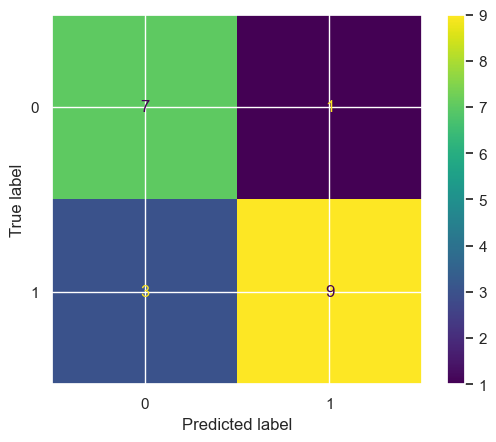

In [158]:
#Abrir dataset avaliações
dfAvaliacao = pd.read_csv("..//datasets//ex2data1.txt",names=["nota_01","nota_2","resultado"])
X = dfAvaliacao[["nota_01","nota_2"]].squeeze().to_numpy()
y = dfAvaliacao["resultado"].squeeze().to_numpy()
X_normalizado = (X-X.mean(axis=0)/X.std(axis=0))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

# Treinar o modelo Gaussian Naive Bayes
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gnb.predict(X_test)

# Avaliar a precisão do modelo
acuracia = np.mean(y_pred == y_test)
print(f'Precisão: {acuracia * 100:.2f}%')

# Plotar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes)
disp.plot()
plt.show()


  - b) aplicar à base de dados para predição
de aprovação de um estudante com base nos resultados de 2 avaliações realizadas por ele.

In [161]:
nota_1,nota_2=(np.random.uniform(16, 90),np.random.uniform(16, 90))
novo_x = np.array([[nota_1,nota_2]])

y_pred = gnb.predict(novo_x)
resultado = "Aprovado" if y_pred[0]==1 else "Reprovado"

print(f"Para avaliações com notas {nota_1:.2f} e {nota_2:.2f}, o resultado foi {resultado}!")

Para avaliações com notas 86.26 e 48.07, o resultado foi Aprovado!


- A base de dados(arquivo ex2data1.txt utilizada no TP1) contem dados históricos referentes a
avaliações passadas, onde as colunas da base são: Avaliação 1, Avaliação 2 e resultado(aprovado
ou reprovado). Compare com os resultados obtidos no TP1. Os resultados são melhores do que
a regressão logística implementada no TP1?



- Após implementar o algoritmo, mostre a superfície de decisão gerada por ele e compare os
resultados(Acurácia média e tempo computacional para o treinamento e o teste) utilizando
validação cruzada.

R: No TP1 o modelo de predição apresentou uma acurácia um pouco melhor, de 89%

### 3. Classificação - Base Câncer de Mama

O objetivo agora é implementar o algoritmo Gaus-
sian Naive Bayes e Regressão Logística para resolução do problema de detecção de pacientes
com câncer de mama. Os algoritmos deverão ser comparados ao final, onde você deverá apon-
tar os prós e contras dos algoritmos com relação ao desempenho obtido. Não se esqueça de
normalizar e separar os dados(treinamento, validação e teste) para efetuar uma avaliação
correta.

A base de dados a ser utilizada nesta questão é conhecida como Wisconsin Diagnostic Breast
Cancer - WDBC e foi produzida pelo Dr. William H. Wolberg, pesquisador do departamento
de Cirurgia Geral da Universidade de Wisconsin. Ela está disponível publicamente no UCI
Machine Learning Repository (<https://archive.ics.uci.edu/static/public/17/breast+cancer+
wisconsin+diagnostic.zip>). Esta base de dados é composta por 569 pacientes (357 saudáveis
e 212 com câncer) e 32 campos (dos quais 30 atributos são úteis) no total, sendo que o primeiro
pode ser descartado, por se tratar do identificador do paciente e o último campo é o rótulo da
classe (0 - Saudável, 1 - com Câncer).

In [197]:
dfDiagnostico = pd.read_csv("../datasets/wdbc.data",names=range(33))
X = dfDiagnostico.loc[:,3:31].squeeze().to_numpy()
y = dfDiagnostico.loc[:,1].squeeze().to_numpy()
y=np.array(y=="M",dtype=int)

X_normalizado = (X - X.mean(axis=0)) / X.std(axis=0)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)


Precisão: 95.61%


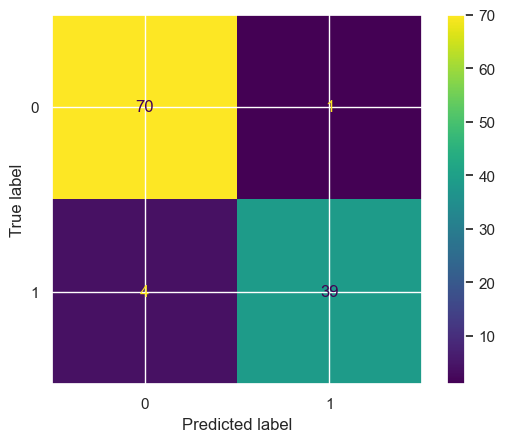

In [199]:
# Treinar o modelo Gaussian Naive Bayes
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gnb.predict(X_test)
y_pred

# Avaliar a precisão do modelo
acuracia = np.mean(y_pred == y_test)
print(f'Precisão: {acuracia * 100:.2f}%')

# Plotar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes)
disp.plot()
plt.show()

Acurácia da regressão logística sem feature engineering = 99.12


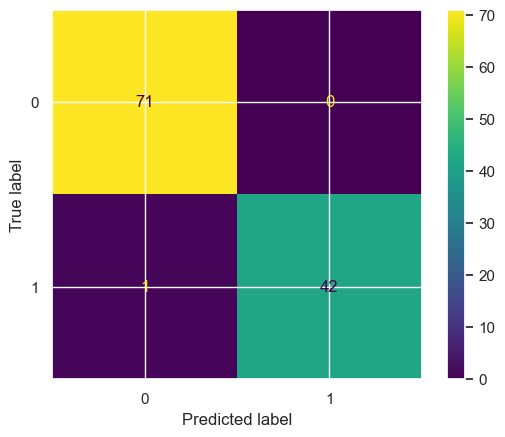

In [204]:
# Criar e treinar o classificador de regressão logística sem feature engineering
classificador = RegressaoLogistica()
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia da regressão logística sem feature engineering = {acuracia*100:.2f}")

# Plotar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes)
disp.plot()
plt.show()

# Relatório sobre Algoritmos Implementados

---

## 1. Gaussian Naive Bayes

### Descrição

O Naive Bayes é um classificador probabilístico baseado no Teorema de Bayes. O Gaussian Naive Bayes, em particular, assume que os dados seguem uma distribuição normal (gaussiana). Este classificador é utilizado principalmente em problemas de classificação e funciona bem quando as características são independentes umas das outras.

### Treinamento e Implementação

No treinamento do Gaussian Naive Bayes, calculamos a média e a variância para cada característica dentro de cada classe. Também calculamos a probabilidade a priori de cada classe. Durante a fase de predição, usamos a fórmula da distribuição normal para calcular a probabilidade de cada ponto de dados pertencer a uma classe específica.

### Resultados e Discussão

A precisão do Gaussian Naive Bayes no conjunto de dados Iris foi de aproximadamente 96.67%. A matriz de confusão indicou que o classificador conseguiu separar bem as classes com poucas classificações incorretas. O Gaussian Naive Bayes é eficiente e trabalha bem com dados normalmente distribuídos, porém a suposição de independência entre características pode ser uma limitação em alguns casos.

---

## 2. Regressão Logística

### Descrição

A Regressão Logística é um modelo estatístico usado para prever a probabilidade de uma variável binária. Para problemas de classificação multiclasse, utiliza-se a técnica One-vs-Rest (OvR), onde um modelo é treinado para cada classe versus todas as outras.

### Treinamento e Implementação

Durante o treinamento, o modelo ajusta os pesos para minimizar a função de custo (log-loss). A fase de predição envolve a aplicação da função sigmoide nos produtos lineares dos pesos e características, classificando o ponto na classe com a maior probabilidade.

### Resultados e Discussão

A precisão do classificador no conjunto de dados Iris foi de aproximadamente 96.67%. A matriz de confusão mostrou uma excelente separação entre as classes. A Regressão Logística é uma técnica poderosa para problemas de classificação binária e multiclasse. Contudo, requer ajustes de hiperparâmetros, como a taxa de aprendizado e o número de iterações, que podem impactar significativamente o desempenho.

---

## 3. K-means

### Descrição

K-means é um algoritmo de agrupamento não supervisionado que particiona os dados em \( K \) clusters. O objetivo é minimizar a variância dentro de cada cluster, ajustando os centróides iterativamente.

### Treinamento e Implementação

Inicialmente, selecionamos \( K \) centróides aleatórios. Em cada iteração, atribuímos cada ponto de dados ao centróide mais próximo e recalculamos os centróides como a média dos pontos atribuídos a cada cluster. Este processo continua até que os centróides se estabilizem ou atinja o número máximo de iterações.

### Resultados e Discussão

Os clusters encontrados pelo K-means foram visualizados e comparados com as classes verdadeiras do conjunto de dados Iris. Embora não haja uma correspondência perfeita, o algoritmo conseguiu agrupar os dados de maneira coerente. A escolha do número de clusters \( K \) é crítica e pode ser determinada por métodos como o cotovelo. K-means é sensível a outliers e pode convergir para mínimos locais, mas é simples e eficiente para muitos problemas de agrupamento.

---

## Conclusão

Os três algoritmos implementados oferecem diferentes abordagens para problemas de aprendizado de máquina. O Gaussian Naive Bayes é rápido e eficaz para dados normalmente distribuídos e independentes. A Regressão Logística é robusta e versátil para classificação binária e multiclasse. O K-means é útil para agrupamento não supervisionado, sendo simples e eficiente, mas requer uma escolha cuidadosa do número de clusters. A escolha do algoritmo apropriado depende do tipo de problema, da natureza dos dados e das suposições que podem ser feitas sobre eles.

---

